In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
from distance_calculator import calculate_distance_matrix

Wczytanie danych

In [47]:
# columns = ['dAge', 'iAvail', 'iClass', 'dDepart', 'iDisabl1', 'iDisabl2', 'dHour89', 'dIncome1', 'dIncome2', 'dIncome3', 'iMeans']

In [2]:
attr = pd.read_csv('attr_desc.csv')
df_raw = pd.read_csv("USCensus1990.data.txt").drop('caseid', axis=1)

In [3]:
df = df_raw.copy()

In [4]:
ordered = attr["Ordered"]

Scaling

In [5]:
df = MinMaxScaler().fit_transform(df)

Przeliczenie dystansów, żeby można było ich używać szybko. Danie metryki ```metric=precomputed``` zakłada, że dane, do których fitujemy to nie obserwacje tylko macierz odległości.

In [6]:
distances = calculate_distance_matrix(df[:1000], ordered)

In [16]:
# TSNE
# tsne_projection = TSNE(n_components=2, metric='precomputed', n_iter=2000).fit_transform(distances)
tsne_projection = TSNE(n_components=2, metric='hamming', n_iter=2000).fit_transform(df[:10000])

c:\Users\jasie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [161]:
# dbscan = DBSCAN(eps=10, metric=mixed_metrix, metric_params={'ordered': ordered}, min_samples=5)
dbscan = DBSCAN(eps=20, metric='precomputed')
labels = dbscan.fit_predict(distances)

In [17]:
# agg = AgglomerativeClustering(n_clusters=None, distance_threshold=30, affinity='precomputed', linkage='complete')
# agg = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
agg = AgglomerativeClustering(n_clusters=5, affinity='hamming', linkage='complete')
labels = agg.fit_predict(df[:10000, :])

In [18]:
x_jitter = (np.random.rand(10000) * 2 - 1) / 30
y_jitter = (np.random.rand(10000) * 2 - 1) / 30

<AxesSubplot:>

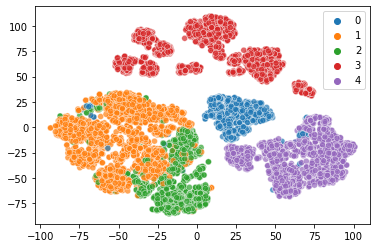

In [20]:
sns.scatterplot(tsne_projection[:10000,0], 
                tsne_projection[:10000,1], 
                hue=labels,
                alpha=0.7,
                palette=sns.color_palette("tab10")[:5])
# sns.scatterplot(df[:10000, 0] + x_jitter, 
#                 df[:10000, 48] + y_jitter, 
#                 hue=labels, 
#                 alpha=0.7, 
#                 palette=sns.color_palette("tab10")[:5]
# )